In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir configurações de exibição
pd.set_option('display.max_columns', None)


## Questão 1


## Carregamento de Dados
Carregar os conjuntos de dados:

Carregar o arquivo august_with_missing_order_days.parquet para entender os dias em que os pedidos já foram feitos ou se eles estão totalmente ausentes para alguns usuários;

Carregar historical_orders.parquet para estudar as tendências históricas dos padrões de pedidos de cada usuário, como:
Frequência de pedidos por mês; 

Distribuição dos dias de pedido ao longo do mês; 

Carregar august_total_sales.parquet para ter as vendas previstas para cada usuário em agosto. Isso pode ajudar a ajustar as previsões, estimando quantos pedidos ainda podem ser esperados, assumindo um valor médio de pedido.

In [2]:
# Carregar os dados
august_total_sales = pd.read_csv("C:/Users/karin/Downloads/data_files_challenge (2)/august_total_sales.csv")
august_with_missing_order_days = pd.read_csv("C:/Users/karin/Downloads/data_files_challenge (2)/august_with_missing_order_days.csv")
historical_orders = pd.read_csv("C:/Users/karin/Downloads/data_files_challenge (2)/historical_orders.csv")

# Exibir uma amostra dos dados
print("Dados de total de vendas em agosto:")
display(august_total_sales.head())

print("Dados com dias de pedidos faltantes para agosto:")
display(august_with_missing_order_days.head())

print("Histórico de pedidos dos usuários:")
display(historical_orders.head())


Dados de total de vendas em agosto:


,account_id,total_transaction_amount_august
0,BR_00000343803,309.99
1,BR_00001415930,874.98
2,BR_00001760106,11976.70
3,BR_00002485176,511.48
4,BR_00002536340,7081.14


Dados com dias de pedidos faltantes para agosto:


,account_id,order_date,transaction_amount
0,BR_09532176632,2022-08-03,11.16
1,BR_09532176632,2022-08-03,32.52
2,BR_09532176632,2022-08-03,24.90
3,BR_09532176632,2022-08-03,28.50
4,BR_09532176632,2022-08-03,11.16


Histórico de pedidos dos usuários:


,account_id,order_date,transaction_amount,__index_level_0__
0,BR_09607801000194,2021-08-28,11011.2,0
1,BR_09607801000194,2021-08-28,13764.0,1
2,BR_09607801000194,2021-08-28,11011.2,2
3,BR_09607801000194,2021-08-28,11011.2,3
4,BR_09607801000194,2021-08-28,13764.0,4


## Pré-processamento dos Dados
Para o conjunto de dados historical_orders, extraímos os dias dos pedidos para identificar padrões históricos de frequência mensal.
Para august_total_sales, adiciona-se colunas para categorizar a intensidade de pedidos com base nas previsões.

In [5]:
# Processar os dados históricos para contar dias de pedido por mês para cada usuário
historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
historical_orders['order_month'] = historical_orders['order_date'].dt.month
historical_orders['order_year'] = historical_orders['order_date'].dt.year

# Contar dias de pedido por usuário e por mês
monthly_order_days = historical_orders.groupby(['account_id', 'order_year', 'order_month'])['order_date'].nunique().reset_index()
monthly_order_days = monthly_order_days.rename(columns={'order_date': 'order_days'})

# Mergir os dados de previsão de vendas com os dados de agosto com dias de pedido faltantes
august_data = pd.merge(august_with_missing_order_days, august_total_sales, on='account_id', how='left')
august_data.head()


,account_id,order_date,transaction_amount,total_transaction_amount_august
0,BR_09532176632,2022-08-03,11.16,2011.36
1,BR_09532176632,2022-08-03,32.52,2011.36
2,BR_09532176632,2022-08-03,24.90,2011.36
3,BR_09532176632,2022-08-03,28.50,2011.36
4,BR_09532176632,2022-08-03,11.16,2011.36


## Análise Exploratória de Dados (EDA)
Explorando a relação entre dias de pedidos históricos e previsões de vendas para identificar tendências ou correlações.

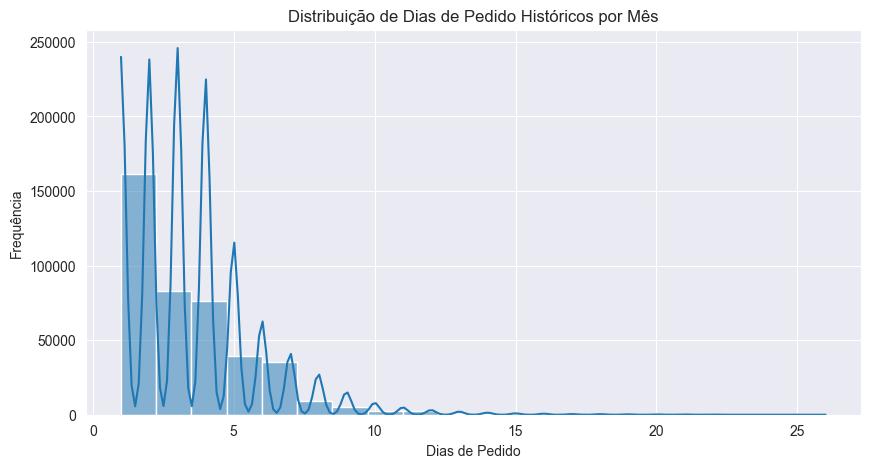

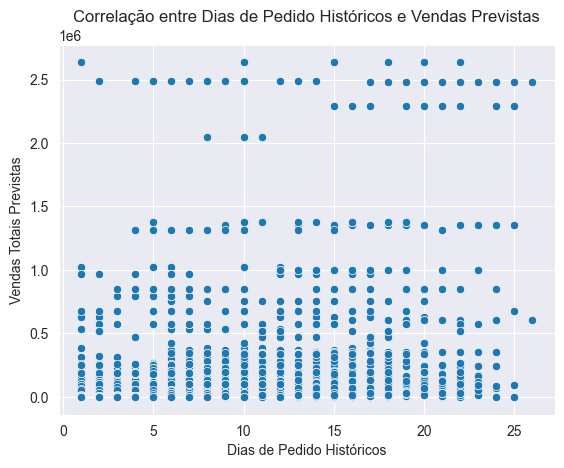

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de dias de pedidos históricos por usuário
plt.figure(figsize=(10, 5))
sns.histplot(monthly_order_days['order_days'], bins=20, kde=True)
plt.title('Distribuição de Dias de Pedido Históricos por Mês')
plt.xlabel('Dias de Pedido')
plt.ylabel('Frequência')
plt.show()

# Análise da correlação entre dias de pedido históricos e vendas previstas em agosto
merged_data = pd.merge(monthly_order_days, august_total_sales, on='account_id', how='inner')
sns.scatterplot(x='order_days', y='total_transaction_amount_august', data=merged_data)
plt.title('Correlação entre Dias de Pedido Históricos e Vendas Previstas')
plt.xlabel('Dias de Pedido Históricos')
plt.ylabel('Vendas Totais Previstas')
plt.show()


##  Exploração e Análise de Dados
Agora vamos analisar os dados carregados. Isso inclui:

Analisar o histórico de pedidos: Calcular o número médio de dias de pedido por mês e identificar padrões no comportamento dos usuários.

In [3]:
# Converter as datas para o formato datetime para análise temporal
historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
august_with_missing_order_days['order_date'] = pd.to_datetime(august_with_missing_order_days['order_date'])

# Adicionar colunas para o ano e mês
historical_orders['month'] = historical_orders['order_date'].dt.month
historical_orders['year'] = historical_orders['order_date'].dt.year

# Calcular o número de dias de pedido por mês para cada usuário nos dados históricos
user_order_days = historical_orders.groupby(['account_id', 'year', 'month'])['order_date'].nunique().reset_index()
user_order_days.rename(columns={'order_date': 'monthly_order_days'}, inplace=True)
display(user_order_days.head())


,account_id,year,month,monthly_order_days
0,BR_00000343803,2021,1,4
1,BR_00000343803,2021,2,2
2,BR_00000343803,2021,3,3
3,BR_00000343803,2021,4,1
4,BR_00000343803,2021,5,3


## Calcular a média e a variância dos dias de pedido para cada usuário:

In [4]:
# Estatísticas de dias de pedido para cada usuário
user_order_stats = user_order_days.groupby('account_id')['monthly_order_days'].agg(['mean', 'std']).reset_index()
user_order_stats.rename(columns={'mean': 'avg_order_days', 'std': 'std_order_days'}, inplace=True)
display(user_order_stats.head())


,account_id,avg_order_days,std_order_days
0,BR_00000343803,2.789474,0.917663
1,BR_00001415930,2.333333,1.527525
2,BR_00001545205,2.555556,1.013794
3,BR_00001760106,4.500000,0.547723
4,BR_00002485176,3.000000,1.581139


## Engenharia de Atributos
Criando atributos que ajudarão o modelo a prever os dias de pedido restantes, como:

Dias restantes em agosto.
Total de vendas previsto.

In [5]:
# Calcular dias de pedido conhecidos em agosto para cada usuário
august_order_days = august_with_missing_order_days.groupby('account_id')['order_date'].nunique().reset_index()
august_order_days.rename(columns={'order_date': 'current_order_days'}, inplace=True)

# Unir dados estatísticos de cada usuário
august_stats = pd.merge(user_order_stats, august_order_days, on='account_id', how='left')
august_stats['remaining_order_days'] = august_stats['avg_order_days'] - august_stats['current_order_days'].fillna(0)
august_stats['remaining_order_days'] = august_stats['remaining_order_days'].apply(lambda x: max(x, 0)) # garantir que não sejam valores negativos

# Calcular dias restantes no mês de agosto
august_stats['remaining_days_in_month'] = 31 - august_stats['current_order_days'].fillna(0)

# Unir com as previsões de vendas para agosto
august_stats = pd.merge(august_stats, august_total_sales, on='account_id', how='left')
display(august_stats.head())


,account_id,avg_order_days,std_order_days,current_order_days,remaining_order_days,remaining_days_in_month,total_transaction_amount_august
0,BR_00000343803,2.789474,0.917663,0.0,2.789474,31.0,309.99
1,BR_00001415930,2.333333,1.527525,0.0,2.333333,31.0,874.98
2,BR_00001545205,2.555556,1.013794,NaN,2.555556,31.0,NaN
3,BR_00001760106,4.500000,0.547723,0.0,4.500000,31.0,11976.70
4,BR_00002485176,3.000000,1.581139,2.0,1.000000,29.0,511.48


# Previsão de Dias Restantes de Pedido para Agosto de 2022

## Objetivo
Prever o número de dias de pedido restantes para cada usuário ao longo do mês de agosto de 2022, usando:
1. Os dias de pedido conhecidos no arquivo `august_with_missing_order_days.parquet`.
2. O histórico de pedidos mensais dos usuários (`historical_orders.parquet`).
3. O total de vendas previstas para o mês de agosto (`august_total_sales.parquet`).

## Estratégia de Solução

### Etapa 1: Estimar a Quantidade Total de Dias de Pedido no Mês
Usando a média histórica de dias de pedido por usuário calculada a partir do arquivo `historical_orders.parquet` e ajustando essa média com o valor total de vendas previsto para agosto (`august_total_sales.parquet`). Essa etapa fornece uma previsão inicial do número total de dias de pedido esperados para cada usuário ao longo do mês.

### Etapa 2: Atualizar a Previsão dos Dias Restantes
À medida que novos dias de pedido são conhecidos ao longo do mês, atualizamos a previsão para refletir o número de dias restantes de pedido. Subtraímos o número de dias conhecidos do total previsto para cada usuário, garantindo que o valor dos dias restantes nunca seja negativo.



In [18]:
# Função para prever o número total de dias de pedido no início do mês
def predict_total_order_days(avg_order_days, total_sales_august, sales_ratio=0.5):
    """
    Calcula a previsão de dias totais de pedido para o mês com base na média histórica
    de dias de pedido e no total de vendas previsto para agosto.

    Parâmetros:
        avg_order_days (float): Média de dias de pedido do usuário em meses anteriores.
        total_sales_august (float): Total de vendas previsto para o usuário em agosto.
        sales_ratio (float): Fator de ajuste para ponderar a média com base nas vendas.

    Retorno:
        int: Número total previsto de dias de pedido no mês.
    """
    predicted_days = avg_order_days * sales_ratio
    return max(1, round(predicted_days))

# Adicionar uma nova coluna para previsão do total de dias de pedido para agosto
august_stats['predicted_total_order_days'] = august_stats.apply(
    lambda row: predict_total_order_days(row['avg_order_days'], row['total_transaction_amount_august']), axis=1
)

# Exibir as previsões iniciais de dias de pedido para o mês
display(august_stats[['account_id', 'avg_order_days', 'total_transaction_amount_august', 'predicted_total_order_days']].head())


,account_id,avg_order_days,total_transaction_amount_august,predicted_total_order_days
0,BR_00000343803,2.789474,309.99,1
1,BR_00001415930,2.333333,874.98,1
2,BR_00001545205,2.555556,NaN,1
3,BR_00001760106,4.500000,11976.70,2
4,BR_00002485176,3.000000,511.48,2


## Atualizar a Previsão dos Dias Restantes

In [19]:
# Atualizar a previsão dos dias restantes de pedido
august_stats['predicted_remaining_order_days'] = august_stats['predicted_total_order_days'] - august_stats['current_order_days']

# Garantir que a previsão dos dias restantes nunca seja negativa
august_stats['predicted_remaining_order_days'] = august_stats['predicted_remaining_order_days'].apply(lambda x: max(0, x))

# Exibir as previsões finais, incluindo dias totais previstos, dias já conhecidos e dias restantes
display(august_stats[['account_id', 'predicted_total_order_days', 'current_order_days', 'predicted_remaining_order_days']].head())


,account_id,predicted_total_order_days,current_order_days,predicted_remaining_order_days
0,BR_00000343803,1,0.0,1.0
1,BR_00001415930,1,0.0,1.0
2,BR_00001545205,1,NaN,0.0
3,BR_00001760106,2,0.0,2.0
4,BR_00002485176,2,2.0,0.0


## Explicação das Etapas

1. **Função `predict_total_order_days`**: Calcula o número total previsto de dias de pedido no mês para cada usuário, com base na média histórica de dias de pedido (`avg_order_days`) e no total de vendas previsto para agosto (`total_sales_august`). A função usa um fator de ajuste (`sales_ratio`) para ponderar a média com base nas vendas, e arredonda o valor para garantir que o mínimo de dias previsto seja 1.

2. **Previsão de Dias Restantes**: Subtrai os dias de pedido já conhecidos (`current_order_days`) do total previsto (`predicted_total_order_days`) para calcular o número de dias de pedido restantes para o mês. A função `max(0, x)` é aplicada para garantir que o valor dos dias restantes não seja negativo.

3. **Resultados**: O DataFrame `august_stats` contém as colunas `predicted_total_order_days` (previsão inicial de dias de pedido no início do mês), `current_order_days` (dias conhecidos até o momento) e `predicted_remaining_order_days` (dias de pedido restantes estimados para o mês).

---

## Conclusão
Com essas etapas, é possível realizar a previsão dinâmica dos dias de pedido restantes ao longo do mês para cada usuário, conforme novos dados de pedidos se tornam disponíveis. Esse modelo pode ajudar a logística a alocar recursos de maneira mais eficiente.


## Analisar Distribuição dos Dias de Pedido Restantes
Uma análise da distribuição dos dias de pedido restantes pode dar insights sobre a variação entre os usuários e confirmar a plausibilidade das previsões.

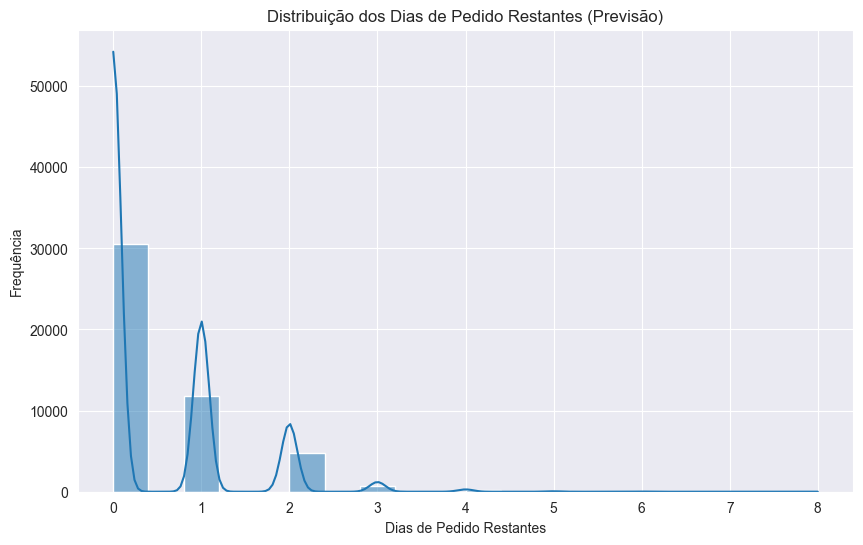

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(august_stats['predicted_remaining_order_days'], bins=20, kde=True)
plt.title("Distribuição dos Dias de Pedido Restantes (Previsão)")
plt.xlabel("Dias de Pedido Restantes")
plt.ylabel("Frequência")
plt.show()


## Questão 2: Explorar a Distribuição dos Dias de Pedido

### 2a. Descrever a Distribuição dos Dias de Pedido

Descrevendo a distribuição do número de dias de pedido de um usuário (ou grupo de usuários), usando uma **distribuição de Poisson**. Esta é uma distribuição de contagem apropriada para modelar a ocorrência de eventos discretos (dias de pedido) em um intervalo fixo (um mês).

A **função de massa de probabilidade (PMF)** da distribuição de Poisson é:

\[
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
\]

onde:
- \( X \) é o número de dias de pedido,
- \( k \) é o número de dias de pedido observado,
- \( \lambda \) é o parâmetro que representa a média de dias de pedido por mês.

### 2b. Estimar o Parâmetro da Distribuição

Para estimar o parâmetro \(\lambda\), usando a média dos dias de pedido nos dados históricos:



In [21]:
# Calcular o parâmetro lambda como a média dos dias de pedido históricos
lambda_estimate = user_order_days['monthly_order_days'].mean()
print("Estimativa de lambda (média dos dias de pedido por mês):", lambda_estimate)

Estimativa de lambda (média dos dias de pedido por mês): 3.4303911467827115


## 2c. Calcular a Probabilidade de Ter Mais de 4 Dias de Pedido

Queremos calcular a probabilidade de um usuário ter **mais de 4 dias de pedido** em um mês, assumindo que o número de dias de pedido segue uma distribuição de Poisson com média \(\lambda\).

A probabilidade de ter mais de 4 dias de pedido é dada por:

\[
P(X > 4) = 1 - P(X \leq 4)
\]

onde \( P(X \leq 4) \) pode ser calculado somando as probabilidades individuais de \( P(X = 0) \), \( P(X = 1) \), ..., \( P(X = 4) \).

Vamos usar a função `poisson.cdf` do `scipy.stats` para calcular \( P(X \leq 4) \) e, em seguida, determinar \( P(X > 4) \).


In [22]:
from scipy.stats import poisson

# Probabilidade de ter mais de 4 dias de pedido
p_more_than_4 = 1 - poisson.cdf(4, lambda_estimate)
print("Probabilidade de ter mais de 4 dias de pedido:", p_more_than_4)


Probabilidade de ter mais de 4 dias de pedido: 0.2614806455560814


## 2d. Estimar o Tempo Entre Dias de Pedido

Agora, estimando o **tempo médio entre dias de pedido** para cada usuário.

Para uma distribuição de Poisson, o tempo entre eventos segue uma **distribuição exponencial** com parâmetro \(\lambda\). A média do tempo entre eventos em uma distribuição exponencial é dada por:

\[
E(T) = \frac{1}{\lambda}
\]

onde \( T \) é o tempo médio entre dias de pedido.

Assim, calculamos o tempo médio entre dias de pedido como a inversa de \(\lambda\).


In [23]:
# Calcular o tempo médio entre dias de pedido
average_time_between_orders = 1 / lambda_estimate
print("Tempo médio entre dias de pedido:", average_time_between_orders)


Tempo médio entre dias de pedido: 0.2915119463673634
